# WorldQuant University  
## (19/09) MScFE 640 Portfolio Theory and Asset Pricing (C18-S4)
## Group work Assignment  \ :: \  Timezone Group 2-D   \ :: \ Submission 2

Tea Toradze (tea_tor@yahoo.com)

In [1]:
# Upload excel file to temporary working environment
from google.colab import files
uploaded = files.upload()



Saving g GWP_PTAP_Data.xlsx to g GWP_PTAP_Data.xlsx


In [0]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_datareader.data as web
import datetime

sns.set()
plt.rcParams['figure.figsize'] = [13, 7]



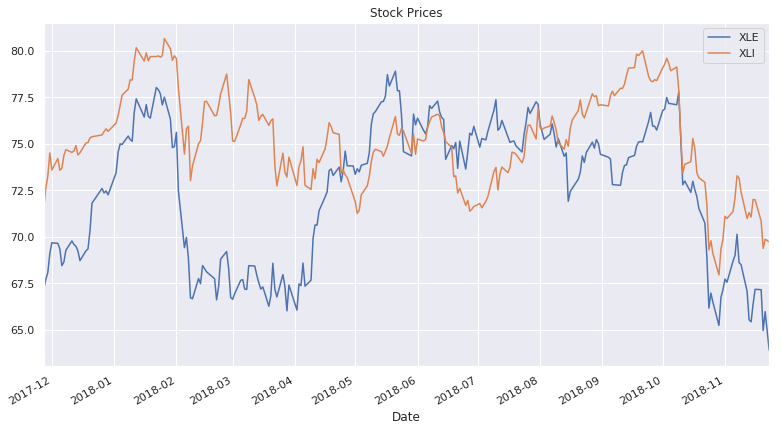

In [3]:
# Loading and visualising price data

XLE = pd.read_excel('g GWP_PTAP_Data.xlsx', skiprows=1, sheet_name=0)
XLE.set_index('Date', inplace=True)

XLI = pd.read_excel('g GWP_PTAP_Data.xlsx', skiprows=1, sheet_name=1)
XLI.set_index('Date', inplace=True)

prices = pd.DataFrame({'XLE':XLE['Closing price'], 'XLI':XLI['Closing price']})
prices.plot(title='Stock Prices')
plt.show()



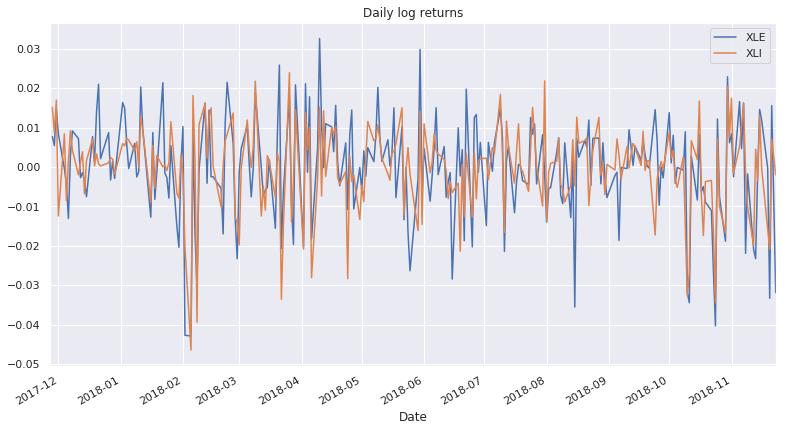

In [4]:
# Compuing and visualising logreturns

XLE['logReturn'] = np.log(XLE['Closing price']) - np.log(XLE['Closing price'].shift(1))
XLI['logReturn'] = np.log(XLI['Closing price']) - np.log(XLI['Closing price'].shift(1))

returns = pd.DataFrame({'XLE':XLE['logReturn'], 'XLI':XLI['logReturn']})
returns.plot(title='Daily log returns')
plt.show()



In [6]:
### Smmarised code and results from submission 1

# Expected returns
XLE_beta = 1.07
XLI_beta = 1.06
Rf = 0.0225
Rm = 0.09

xle_er = (Rf + XLE_beta * (Rm - Rf)) * 100
xli_er = (Rf + XLI_beta * (Rm - Rf)) * 100

print('XLE expected return: {}%'.format(xle_er))
print('XLI expected return: {}%'.format(xli_er))


# Standard deviations of returns
xle_daily_std = XLE.logReturn.std()
xli_daily_std = XLI.logReturn.std()

xle_ann_std = xle_daily_std * np.sqrt(252) * 100
xli_ann_std = xli_daily_std * np.sqrt(252) * 100

print('\nXLE daily std: {}%'.format(round(xle_daily_std * 100, 2)))
print('XLI daily std: {}%'.format(round(xli_daily_std * 100, 2)))
print('XLE annualized std: {}%'.format(round(xle_ann_std, 2)))
print('XLI annualized std: {}%'.format(round(xli_ann_std, 2)))


# Correlation of returns
corr = pd.DataFrame({'xle':XLE.logReturn, 'xli':XLI.logReturn}).corr().iloc[0,1]
corr
print('\nCorrelation of returns: {:.2f}'.format(corr))



XLE expected return: 9.4725%
XLI expected return: 9.405%

XLE daily std: 1.28%
XLI daily std: 1.08%
XLE annualized std: 20.32%
XLI annualized std: 17.12%

Correlation of returns: 0.66



---   ---   ---   ---   ---   ---   ---
**Task 2(a):** Calculate and draw a scatter plot graph of the efficient frontier 
based on 11 combinations of XLE and XLI:

* Portfolio 1 = 100\% XLE + 0\% XLI
* Portfolio 2 = 90\% XLE + 10\% XLI
*  ...
*  ...
* Portfolio 11 = 0\% XLE + 100\% XLI


In [7]:
# Calculating portfolio returns
portfolios = pd.DataFrame([['Portfolio '+str(i) , round(1.1 - 0.1 * i, 1), round(0.1 * i - 0.1, 2)] 
                           for i in np.arange(1, 12)], columns=['name', 'XLE_w', 'XLI_w'])

portfolios['return%'] = portfolios.apply(lambda x: x.XLE_w * xle_er + x.XLI_w * xli_er, axis=1)
portfolios



,name,XLE_w,XLI_w,return%
0,Portfolio 1,1.0,0.0,9.47250
1,Portfolio 2,0.9,0.1,9.46575
2,Portfolio 3,0.8,0.2,9.45900
3,Portfolio 4,0.7,0.3,9.45225
4,Portfolio 5,0.6,0.4,9.44550
5,Portfolio 6,0.5,0.5,9.43875
6,Portfolio 7,0.4,0.6,9.43200
7,Portfolio 8,0.3,0.7,9.42525
8,Portfolio 9,0.2,0.8,9.41850
9,Portfolio 10,0.1,0.9,9.41175


In [8]:
# Calculating portfolio volatilities
portfolios['volatility%'] = portfolios.apply(lambda x: np.sqrt( 
    (x.XLE_w * xle_ann_std)**2 + (x.XLI_w * xli_ann_std)**2 + 
    2 * x.XLE_w * xle_ann_std * x.XLI_w * xli_ann_std * corr), axis=1)
portfolios



,name,XLE_w,XLI_w,return%,volatility%
0,Portfolio 1,1.0,0.0,9.47250,20.319553
1,Portfolio 2,0.9,0.1,9.46575,19.459428
2,Portfolio 3,0.8,0.2,9.45900,18.692109
3,Portfolio 4,0.7,0.3,9.45225,18.029448
4,Portfolio 5,0.6,0.4,9.44550,17.483351
5,Portfolio 6,0.5,0.5,9.43875,17.065011
6,Portfolio 7,0.4,0.6,9.43200,16.783985
7,Portfolio 8,0.3,0.7,9.42525,16.647228
8,Portfolio 9,0.2,0.8,9.41850,16.658293
9,Portfolio 10,0.1,0.9,9.41175,16.816889


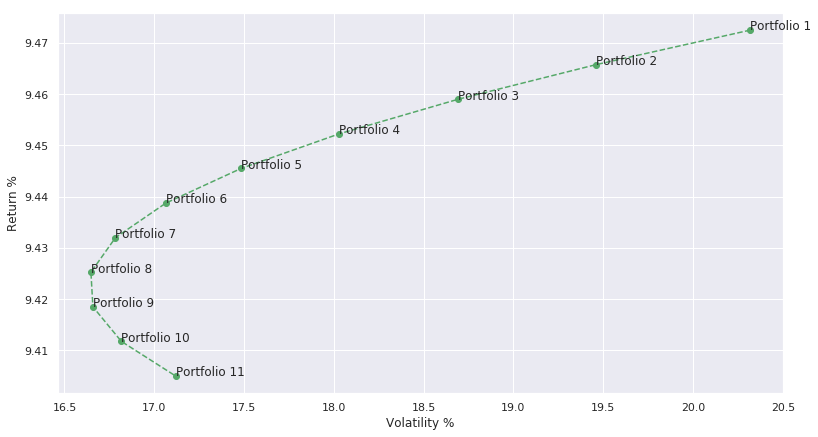

In [9]:
# Plotting efficient frontier
fig, ax = plt.subplots()
plt.plot(portfolios['volatility%'], portfolios['return%'], '.--g', marker='o')
plt.xlabel('Volatility %')
plt.ylabel('Return %')
portfolios[['volatility%', 'return%', 'name']].apply(lambda x: ax.text(*x), axis=1)
plt.show()




---   ---   ---   ---   ---   ---   ---
**Task 2(b):** Select a portfolio from portfolios 1-11 on the efficient frontier 
that satisfies the following constraints:

* The return is greater than 9.43\%
* The volatility is not greater than 16.8\%


In [10]:
portfolios[(portfolios['volatility%']<=16.8) & (portfolios['return%']>9.43)]



,name,XLE_w,XLI_w,return%,volatility%
6,Portfolio 7,0.4,0.6,9.432,16.783985


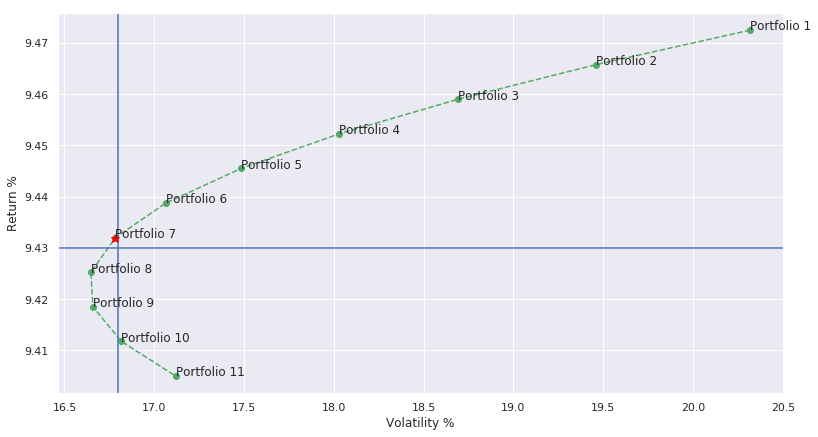

In [11]:
# Plotting all together
fig, ax = plt.subplots()
plt.plot(portfolios['volatility%'], portfolios['return%'], '.--g', marker='o')
plt.xlabel('Volatility %')
plt.ylabel('Return %')
portfolios[['volatility%', 'return%', 'name']].apply(lambda x: ax.text(*x), axis=1)
ax.axhline(9.43)
ax.axvline(16.8)
plt.plot([portfolios.loc[6]['volatility%']], [portfolios.loc[6]['return%']], 
         marker='*', markersize=9, color="red")
plt.show()




---   ---   ---   ---   ---   ---   ---
**Task 2(c):** Comment on how the portfolio selected in Submission 2(b) 
is expected to perform relative to the S\&P 500 in terms of the following:

* Return
* Risk
* Risk-adjusted return, including the Sharpe Ratio


In [0]:
# Download S&P500 data
start = datetime.datetime(2017, 11, 27)  
end = datetime.datetime(2018, 11, 23)  
sp500=web.DataReader("^GSPC", 'yahoo', start, end)



In [13]:
#  S&P500 log return
sp500_ret = np.log(sp500.iloc[-1]['Adj Close'] / sp500.iloc[0]['Adj Close']) * 100
sp500['logReturn'] = np.log(sp500['Adj Close']) - np.log(sp500['Adj Close'].shift(1))

print('S&P500 return for the period: {:.2f}%'.format(sp500_ret))



S&P500 return for the period: 1.19%


In [14]:
# S&P500 daily and annualised standard deviations
sp500_daily_std = sp500.logReturn.std()
sp500_ann_std = sp500_daily_std * np.sqrt(252) * 100

print('S&P500 daily std: {:.2f}%'.format(sp500_daily_std * 100))
print('S&P500 annualised std: {:.2f}%'.format(sp500_ann_std))



S&P500 daily std: 0.94%
S&P500 annualised std: 14.86%


In [0]:
# Portfolio7  returns according to the weight distribution
portfolio7_ret = 0.4 * XLE['logReturn'] + 0.6 * XLI['logReturn']


# Portfolio #7 active returns
active_returns = portfolio7_ret - sp500['logReturn']



In [16]:
# Portfolio7 average active return
avg_active_return = active_returns.mean()
print('Portfolio7 average active return: {:.6f}%'.format(avg_active_return))



Portfolio7 average active return: -0.000189%


In [17]:
# Portfolio7 tracking error
portfolio7_te = active_returns.std()
print('Portfolio7 tracking error: {:.6f}%'.format(portfolio7_te))



Portfolio7 tracking error: 0.005156%


In [18]:
# Portolio7 mean adjusted tracking error
sp_len = len(sp500)

portfolio7_mate = np.sqrt((np.sum((active_returns)**2) / sp_len))
print('Portolio7 mean adjusted tracking error: {:.6f}%'.format(portfolio7_mate))



Portolio7 mean adjusted tracking error: 0.005139%


In [19]:
# Portolio7 Sharpe ratio
sharperatio = (portfolios.loc[6]['return%'] - 100 * Rf) / portfolios.loc[6]['volatility%']
print('Portfolio7 Sharpe ratio: {:.6f}%'.format(sharperatio))



Portfolio7 Sharpe ratio: 0.427908%



---   ---   ---   ---   ---   ---   ---
**Task 2(d):** Comment on the appropriateness of the S\&P 500 as a benchmark for the portfolio.

In [0]:
# (No coding requied)